In [2]:
import matplotlib.pyplot as plt
import statistics

Text(0, 0.5, 'Average adversary score (across 100 trials)')

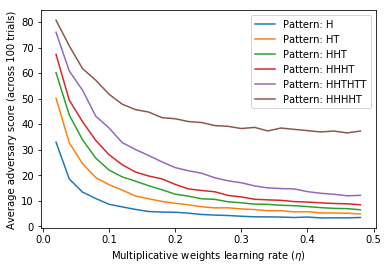

In [9]:
# Matching pennies: etas [0.02 --> 0.5, 0.02], count = 100
etas = [0.02,0.04,0.06,0.08,0.1,0.12000000000000001,0.14,0.16,0.18,0.19999999999999998,0.21999999999999997,0.23999999999999996,0.25999999999999995,0.27999999999999997,0.3,0.32,0.34,0.36000000000000004,0.38000000000000006,0.4000000000000001,0.4200000000000001,0.4400000000000001,0.46000000000000013,0.48000000000000015]
learnerscore = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]

userscore0 = [32.93,18.52,13.37,10.87,8.61,7.58,6.59,5.77,5.56,5.48,5.12,4.61,4.37,4.2,3.92,3.69,3.67,3.6,3.42,3.61,3.26,3.31,3.28,3.43]
userscore01 = [50.14,32.7,24.54,19.09,16.27,14.17,11.84,10.77,9.73,9,8.41,7.63,7.2,7.22,6.78,6.53,6.07,6.08,5.63,5.69,5.21,5.2,5.11,4.77]
userscore001 = [60.18,43.55,33.9,26.71,22.01,19.34,17.64,15.87,14.3,12.57,11.8,10.75,10.53,9.58,9.19,8.65,8.58,8.22,8.04,7.7,7.29,7.01,6.9,6.45]
userscore0001 = [67.32,49.4,40.99,33.64,28.04,24.09,21.25,19.68,18.56,16.4,14.63,14.01,13.5,12.07,11.48,10.57,10.33,10.15,9.66,9.48,9.16,8.92,8.78,8.43]
userscore00001 = [80.71,70.69,61.77,57.22,51.73,47.81,45.69,44.74,42.54,42.12,41.02,40.63,39.44,39.15,38.28,38.73,37.34,38.48,37.95,37.46,36.95,37.3,36.57,37.31]
userscore001011 = [75.98,60.84,53.31,43.14,38.52,32.76,30.06,27.71,25.23,22.98,21.73,20.78,18.97,17.79,17.04,15.8,15.02,14.77,14.62,13.56,12.91,12.54,11.92,12.11]

plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore001)
plt.plot(etas, userscore0001)
plt.plot(etas, userscore001011)
plt.plot(etas, userscore00001)

plt.legend(["Pattern: H", "Pattern: HT", "Pattern: HHT", "Pattern: HHHT", "Pattern: HHTHTT", "Pattern: HHHHT"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average adversary score (across 100 trials)")
# plt.title("Effect of $\eta$ on performance of Matching Pennies learner against a predictable adversary") 

Text(0, 0.5, 'Average percentage of rounds won by learner (across 10 trials)')

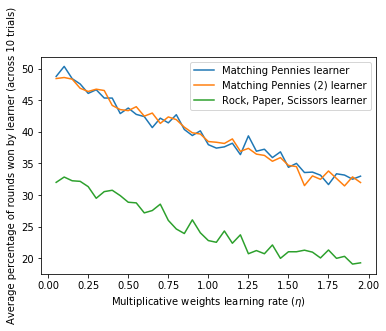

In [17]:
import numpy as np

# Adversaries: etas [0.05 --> 2, 0.05], count = 20
etas = [0.05,0.1,0.15000000000000002,0.2,0.25,0.3,0.35,0.39999999999999997,0.44999999999999996,0.49999999999999994,0.5499999999999999,0.6,0.65,0.7000000000000001,0.7500000000000001,0.8000000000000002,0.8500000000000002,0.9000000000000002,0.9500000000000003,1.0000000000000002,1.0500000000000003,1.1000000000000003,1.1500000000000004,1.2000000000000004,1.2500000000000004,1.3000000000000005,1.3500000000000005,1.4000000000000006,1.4500000000000006,1.5000000000000007,1.5500000000000007,1.6000000000000008,1.6500000000000008,1.7000000000000008,1.7500000000000009,1.800000000000001,1.850000000000001,1.900000000000001,1.950000000000001]

MP_userscore = np.array([96.8,93.95,97.55,98.7,99.5,99.05,99.3,100,100,99.45,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100])
MP_learnerscore = np.array([92.15,95.3,91.55,89.55,85.05,86.65,82.4,82.95,75.1,77.4,74.7,73.65,68.55,72.9,70.7,74.55,67.7,65.05,67.1,61.2,59.8,60.3,61.8,57.2,64.9,58.55,59.35,56.05,58.3,52.4,53.85,50.5,50.65,49.55,46.3,50.05,49.6,48.15,49.2])
MP2_userscore = np.array([97.35,95.25,98.8,98.15,99.15,98.7,98.95,98.8,100,99.5,99.05,100,100,100,99.95,100,99.95,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100])
MP2_learnerscore = np.array([91.45,90.05,92.45,86.65,85.8,86.65,86.15,78.2,77.05,76.15,77.75,73.85,75.35,70.45,73.45,72.2,68.7,66.25,65.7,62.5,62.2,61.7,63.6,58.5,59.7,57.4,56.9,54.65,56.05,53.1,52.65,45.95,49.3,48.1,51.05,48.4,45.85,48.95,47])
RPS_userscore = np.array([100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100])
RPS_learnerscore = np.array([47.05,48.9,47.6,47.4,45.6,41.8,43.95,44.4,42.65,40.55,40.35,37.3,38,39.95,35.1,32.65,31.4,35.25,31.6,29.5,29.05,32.1,28.8,31.05,26.1,26.9,26.1,28.35,24.95,26.6,26.6,27,26.5,25.05,27.05,24.95,25.45,23.55,23.85])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies learner", "Matching Pennies (2) learner", "Rock, Paper, Scissors learner"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner (across 10 trials)")

Text(0, 0.5, 'Average percentage of rounds won by learner (across 10 trials)')

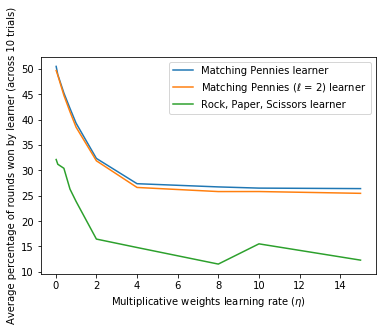

In [22]:
import numpy as np

# Adversaries
etas = [0.02,0.1,0.4,0.7,1,2,4,8,10,15]

MP_userscore = np.array([93.66,96.24,99.83,100,99.94,100,100,100,100,100]) # average of 100
MP_learnerscore = np.array([95.52,91.95,82.48,73.04,64.69,47.8,37.66,36.47,36.03,35.85])
MP2_userscore = np.array([95.23,96.23,99.73,100,99.98,100,100,100,100,100])
MP2_learnerscore = np.array([94.03,91.55,80.88,71.06,62.59,46.78,36.27,34.78,34.79,34.15])
RPS_userscore = np.array([100,100,100,100,100,100,100,100,100,100]) # average of 20
RPS_learnerscore = np.array([47.333333333333336,45.333333333333336,43.666666666666664,35.666666666666664,31.333333333333332,19.666666666666668,17.333333333333332,13,18.333333333333332,14])

# Add up total number of rounds
MP_total = MP_userscore + MP_learnerscore
MP2_total = MP2_userscore + MP2_learnerscore
RPS_total = RPS_userscore + RPS_learnerscore

# Percentage of rounds won by the learner
MP_percent = MP_learnerscore / MP_total * 100
MP2_percent = MP2_learnerscore / MP2_total * 100
RPS_percent = RPS_learnerscore / RPS_total * 100

plt.plot(etas, MP_percent)
plt.plot(etas, MP2_percent)
plt.plot(etas, RPS_percent)

plt.legend(["Matching Pennies learner", "Matching Pennies ($\ell$ = 2) learner", "Rock, Paper, Scissors learner"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average percentage of rounds won by learner (across 10 trials)")

# every N rounds, adversary runs into a tiebreak which gives learner a (1/N) chance of winning

Text(0, 0.5, 'Average learner score (10 trials)')

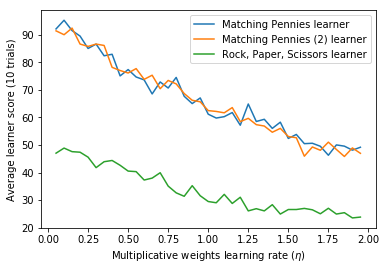

In [13]:
# Adversaries: etas [0.05 --> 2, 0.05], count = 20
etas = [0.05,0.1,0.15000000000000002,0.2,0.25,0.3,0.35,0.39999999999999997,0.44999999999999996,0.49999999999999994,0.5499999999999999,0.6,0.65,0.7000000000000001,0.7500000000000001,0.8000000000000002,0.8500000000000002,0.9000000000000002,0.9500000000000003,1.0000000000000002,1.0500000000000003,1.1000000000000003,1.1500000000000004,1.2000000000000004,1.2500000000000004,1.3000000000000005,1.3500000000000005,1.4000000000000006,1.4500000000000006,1.5000000000000007,1.5500000000000007,1.6000000000000008,1.6500000000000008,1.7000000000000008,1.7500000000000009,1.800000000000001,1.850000000000001,1.900000000000001,1.950000000000001]

# MP_userscore = [96.8,93.95,97.55,98.7,99.5,99.05,99.3,100,100,99.45,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
MP_learnerscore = [92.15,95.3,91.55,89.55,85.05,86.65,82.4,82.95,75.1,77.4,74.7,73.65,68.55,72.9,70.7,74.55,67.7,65.05,67.1,61.2,59.8,60.3,61.8,57.2,64.9,58.55,59.35,56.05,58.3,52.4,53.85,50.5,50.65,49.55,46.3,50.05,49.6,48.15,49.2]
# MP2_userscore = [97.35,95.25,98.8,98.15,99.15,98.7,98.95,98.8,100,99.5,99.05,100,100,100,99.95,100,99.95,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
MP2_learnerscore = [91.45,90.05,92.45,86.65,85.8,86.65,86.15,78.2,77.05,76.15,77.75,73.85,75.35,70.45,73.45,72.2,68.7,66.25,65.7,62.5,62.2,61.7,63.6,58.5,59.7,57.4,56.9,54.65,56.05,53.1,52.65,45.95,49.3,48.1,51.05,48.4,45.85,48.95,47]
# RPS_userscore = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
RPS_learnerscore = [47.05,48.9,47.6,47.4,45.6,41.8,43.95,44.4,42.65,40.55,40.35,37.3,38,39.95,35.1,32.65,31.4,35.25,31.6,29.5,29.05,32.1,28.8,31.05,26.1,26.9,26.1,28.35,24.95,26.6,26.6,27,26.5,25.05,27.05,24.95,25.45,23.55,23.85]

# plt.plot(etas, MP_userscore)
plt.plot(etas, MP_learnerscore)
# plt.plot(etas, MP2_userscore)
plt.plot(etas, MP2_learnerscore)
# plt.plot(etas, RPS_userscore)
plt.plot(etas, RPS_learnerscore)

plt.legend(["Matching Pennies learner", "Matching Pennies (2) learner", "Rock, Paper, Scissors learner"])
# plt.legend(["Matching Pennies user", "Matching Pennies learner", "Matching Pennies (2) user", "Matching Pennies (2) learner", "Rock, Paper, Scissors user", "Rock, Paper, Scissors learner"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average learner score (10 trials)")

Text(0, 0.5, 'Average adversary score (across 100 trials)')

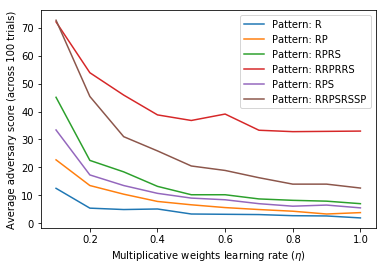

In [10]:
# Rock, paper, scissors: etas [0.1 --> 1, 0.1], count = 10
etas = [0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7,0.7999999999999999,0.8999999999999999,0.9999999999999999]
learnerscore = [100,100,100,100,100,100,100,100,100,100]

userscore0 = [12.5,5.4,4.9,5.1,3.3,3.2,3.1,2.7,2.6,1.9]
userscore01 = [22.7,13.5,10.4,7.8,6.6,5.6,4.9,4.3,3.3,3.8]
userscore0102 = [45.1,22.5,18.4,13.2,10.2,10.2,8.7,8.2,7.9,7]
userscore001002 = [72.1,53.9,45.9,38.8,36.8,39.1,33.3,32.8,32.9,33]
userscore012 = [33.4,17.3,13.5,10.7,9,8.4,7,6.1,6.5,5.5]
userscore00120221 = [72.7,45.4,31,25.9,20.5,18.9,16.3,14,14,12.6]

plt.plot(etas, userscore0)
plt.plot(etas, userscore01)
plt.plot(etas, userscore0102)
plt.plot(etas, userscore001002)
plt.plot(etas, userscore012)
plt.plot(etas, userscore00120221)

plt.legend(["Pattern: R", "Pattern: RP", "Pattern: RPRS", "Pattern: RRPRRS", "Pattern: RPS", "Pattern: RRPSRSSP"])
plt.xlabel("Multiplicative weights learning rate ($\eta$)")
plt.ylabel("Average adversary score (across 100 trials)")
# plt.title("Effect of $\eta$ on Rock, Paper, Scissors with predictable action patterns") 